<a href="https://colab.research.google.com/github/KOMBOU12/Marius/blob/main/Introduction_par_Julie_Josse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Le but de ce projet est de faire tourner les codes présentés par Julie JOSSE avec d'autres jeux de données

**1-1 La méthode EM pour des données gaussiennes bivariées.**

L'objectif de ce problème est d'utiliser l'algorithme EM pour estimer la moyenne d'un ensemble de données normales bivariées comportant des valeurs manquantes dans l'une des deux variables. Nous générons  des données synthétiques différentes de Julie Josse, puis nous mettons en œuvre l'algorithme EM pour calculer l'estimateur de la moyenne.

In [ ]:
install.packages("norm")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(norm)
data(mdata)
pre <- prelim.norm(as.matrix(mdata))
thetahat <- em.norm(pre)

This package has some major limitations
(for example, it does not work reliably when
the number of variables exceeds 30),
and has been superseded by the norm2 package.



Iterations of EM: 
1...2...3...4...5...6...7...8...9...10...11...12...13...14...15...16...17...


In [ ]:
install.packages("mvtnorm")
library(mvtnorm)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Ce code génère des données bivariées normalement distribuées avec des valeurs manquantes à 30%.  

Le jeu de données comporte $ n $ échantillons contenant des valeurs manquantes uniquement dans la variable $ y_2$. En d'autres termes, pour un indice donné d'échantillons $ r \leq n $, pour $ i = 1, \ldots, r $, $ (y_{i1}, y_{i2}) $ sont complètement observés ; tandis que pour $ i = r + 1, \ldots, n $, nous n'observons que $ y_{i1} $. L'objectif est d'estimer la moyenne $ \mu $.

Nous comparerons deux stratégies :
1. Calcul direct de l'estimateur du maximum de vraisemblance.
2. Estimation avec l'algorithme EM.

In [ ]:
set.seed(100)

n <- 100
r <- floor(n*0.3)
mu <- c(2.22, -6.06)
# Sigma doit être symétrique
Sigma <- matrix(c(2.5, 0.4, 0.4, 0.9), nrow=2)  #

Y <- rmvnorm(n, mean=mu, sigma=Sigma)
missing_idx <- sample(100, r, replace = FALSE)
Y[missing_idx, 2] <- NA

On calcule les estimations du maximum de vraisemblance de $\mu_1$ et $\mu_2$

In [ ]:
hat_mu1_ML <- (1/n)*sum(Y[,1])
bar_y1 <- mean(Y[setdiff(1:n,missing_idx), 1]) # mean(Y[!((1:n)%in%missing_idx), 1])
bar_y2 <-mean(Y[setdiff(1:n,missing_idx), 2])
s_11 <- mean((Y[setdiff(1:n,missing_idx),1]-bar_y1)^2)
s_22 <- mean((Y[setdiff(1:n,missing_idx),2]-bar_y2)^2)
s_12 <- mean((Y[setdiff(1:n,missing_idx),1]-bar_y1)*(Y[setdiff(1:n,missing_idx),2]-bar_y2))
hat_beta_21.1 <- s_12/s_11
hat_beta_20.1 <- bar_y2-hat_beta_21.1*bar_y1
hat_mu2_ML <- hat_beta_20.1+hat_beta_21.1*hat_mu1_ML
resML <- c(hat_mu1_ML=hat_mu1_ML,hat_mu2_ML=hat_mu2_ML)

In [ ]:
Estep=function(Y, mu, Sigma, missing_idx)
{
n=nrow(Y)
sigma_22.1=Sigma[2,2]-Sigma[1,2]^2/Sigma[1,1]
beta_21.1=Sigma[1,2]/Sigma[1,1]
beta_20.1=mu[2]-beta_21.1*mu[1]

E_y2=rep(0, n)
E_y2[missing_idx]=rep(beta_20.1, length(missing_idx))+beta_21.1*Y[missing_idx,1]
E_y2[setdiff(1:n, missing_idx)]=Y[setdiff(1:n, missing_idx),2]
E_y1=Y[,1]
E_y2_y2=rep(0, n)
E_y2_y2[missing_idx]=E_y2[missing_idx]^2+rep(sigma_22.1, length(missing_idx))
E_y2_y2[setdiff(1:n, missing_idx)]=E_y2[setdiff(1:n, missing_idx)]^2
E_y1_y1=Y[,1]^2
E_y1_y2=rep(0, n)
E_y1_y2=E_y2*E_y1
return(structure(list(s1=sum(E_y1), s2=sum(E_y2), s11=sum(E_y1_y1), s22=sum(E_y2_y2), s12=sum(E_y1_y2))))
}

Mstep=function(Y, s1, s2, s11, s22, s12)
{
n=nrow(Y)
mu1=s1/n
mu2=s2/n
sigma1=s11/n-mu1^2
sigma2=s22/n-mu2^2
sigma12=s12/n-mu1*mu2
mu=c(mu1,mu2)
Sigma=matrix(c(sigma1, sigma12,sigma12,sigma2), nrow=2)
return(structure(list(mu=mu, Sigma=Sigma)))
}

On implémente une fonction  initEM

In [ ]:
initEM=function(Y, missing_idx)
{
n=nrow(Y)
r=n-length(missing_idx)
mu1=mean(Y[,1])
mu2=mean(Y[,2], na.rm=T)
sigma1=mean(Y[,1]^2)-mu1^2
sigma2=mean(Y[,2]^2, na.rm=T)-mu2^2
sigma12=mean(Y[,1]*Y[,2], na.rm=T)-mu1*mu2
mu=c(mu1,mu2)
Sigma=matrix(c(sigma1, sigma12,sigma12,sigma2), nrow=2)
return(structure(list(mu=mu, Sigma=Sigma)))
}

[1]  1.990499 -5.844650
[1]  1.990499 -5.846090
[1]  1.990499 -5.846753
[1]  1.990499 -5.847009
[1]  1.990499 -5.847101
[1]  1.990499 -5.847132
[1]  1.990499 -5.847142
[1]  1.990499 -5.847145
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5.847147
[1]  1.990499 -5

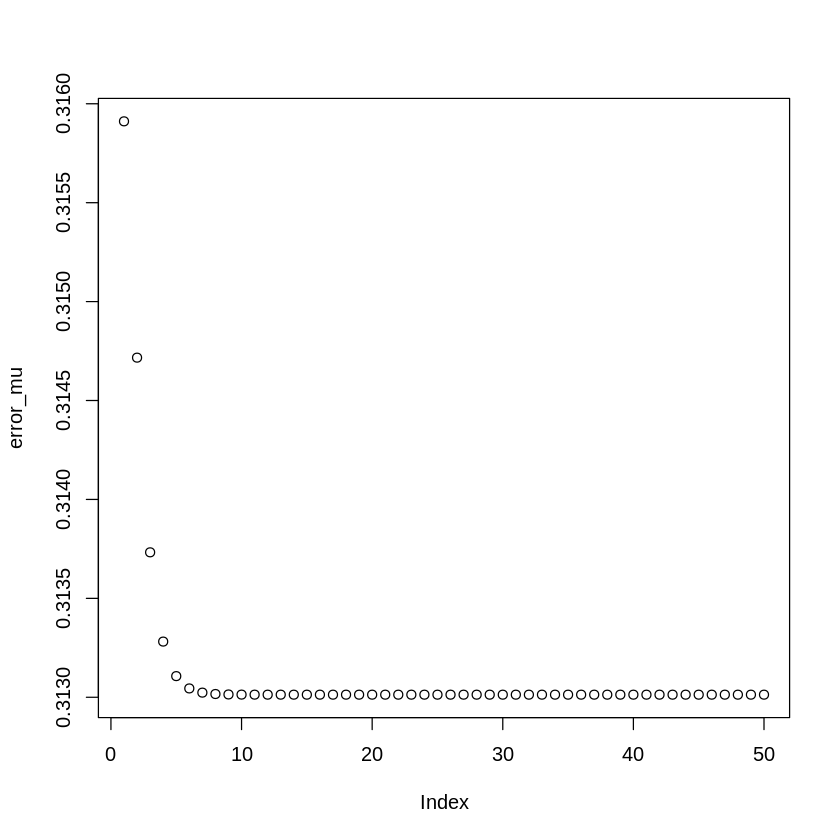

In [ ]:
init=initEM(Y, missing_idx)
hat_mu=init$mu
hat_Sigma=init$Sigma
error_mu=rep(0,50)
for(i in 1:50)
{
error_mu[i]=sqrt(sum((hat_mu-mu)^2))
# E step
E=Estep(Y, hat_mu, hat_Sigma, missing_idx)
s1=E$s1
s11=E$s11
s2=E$s2
s22=E$s22
s12=E$s12
M=Mstep(Y, s1, s2, s11, s22, s12)
hat_mu=M$mu
print(hat_mu)
hat_Sigma=M$Sigma
}
plot(error_mu)

On observe que l'erreur diminue rapidement lors des premières itérations, indiquant que l'algorithme converge vers une estimation précise de
μ. Après environ 10 itérations, l'erreur devient stable, suggérant que l'algorithme a atteint une convergence et que les estimations de
μ ne s'améliorent plus de manière significative. Cela montre une convergence rapide vers le maximum de vraisemblance pour les paramètres.

On vérifie que l'estimateur EM
μ est égal à l'estimateur du maximum de vraisemblance.

In [ ]:
resEM <- hat_mu
resEM
resML

[1]  1.990499 -5.847147

hat_mu1_ML hat_mu2_ML 
  1.990499  -5.847147

In [ ]:
init=initEM(Y, missing_idx)
hat_mu=init$mu
old_hat_mu = old_old_hat_mu = 0
hat_Sigma=init$Sigma
error_mu=rep(0,20)
for(i in 1:20)
{
old_old_hat_mu = old_hat_mu
old_hat_mu = hat_mu
# E step
E=Estep(Y, hat_mu, hat_Sigma, missing_idx)
s1=E$s1
s11=E$s11
s2=E$s2
s22=E$s22
s12=E$s12
M=Mstep(Y, s1, s2, s11, s22, s12)
hat_mu=M$mu
hat_Sigma=M$Sigma
if(i>=3){cat('Iteration=',i,", Convergence rate of mu2 =",(hat_mu-old_hat_mu)[2]/(old_hat_mu-old_old_hat_mu)[2],'\n')}
}
cat("Percentage of missingness is:", sum(is.na(Y[,2]))/dim(Y)[1])
# Pourcentage de valeurs manquantes

Iteration= 3 , Convergence rate of mu2 = 0.4597141 
Iteration= 4 , Convergence rate of mu2 = 0.3873336 
Iteration= 5 , Convergence rate of mu2 = 0.3568802 
Iteration= 6 , Convergence rate of mu2 = 0.3403751 
Iteration= 7 , Convergence rate of mu2 = 0.3301957 
Iteration= 8 , Convergence rate of mu2 = 0.3234102 
Iteration= 9 , Convergence rate of mu2 = 0.3186497 
Iteration= 10 , Convergence rate of mu2 = 0.315189 
Iteration= 11 , Convergence rate of mu2 = 0.3126076 
Iteration= 12 , Convergence rate of mu2 = 0.3106447 
Iteration= 13 , Convergence rate of mu2 = 0.3091304 
Iteration= 14 , Convergence rate of mu2 = 0.307949 
Iteration= 15 , Convergence rate of mu2 = 0.3070192 
Iteration= 16 , Convergence rate of mu2 = 0.3062832 
Iteration= 17 , Convergence rate of mu2 = 0.3056946 
Iteration= 18 , Convergence rate of mu2 = 0.3052214 
Iteration= 19 , Convergence rate of mu2 = 0.304882 
Iteration= 20 , Convergence rate of mu2 = 0.3045674 
Percentage of missingness is: 0.3

Si les données ne sont pas MAR, mais MNAR, il existe un biais dans les estimateurs, et il est donc nécessaire de spécifier un modèle pour les valeurs manquantes.

**Définition :**

*   **MAR (Missing At Random)** signifie que les valeurs manquantes dépendent d’autres variables observées mais pas de la variable elle-même. Par exemple, dans un sondage, les personnes plus âgées peuvent omettre de répondre à des questions sur les réseaux sociaux, mais cette absence dépend de l'âge, qui est observable.
*   **MNAR (Missing Not At Random)** signifie que les valeurs manquantes dépendent de la variable elle-même ou d’autres variables non observées. Par exemple dans les études de santé où les patients atteints de maladies graves peuvent être plus susceptibles de manquer des visites de suivi en raison de la gravité de leur état. Dans ce cas, l'absence de données (les visites manquées) est liée à la gravité de la maladie elle-même, qui est précisément l'information manquante. Ici, les données manquantes ne sont pas aléatoires et reflètent un biais dans l’échantillonnage en fonction de l’état de santé du patient.
*   **MCAR (Missing Completely At Random)** désigne un mécanisme de valeurs manquantes dans lequel les absences de données ne sont liées ni aux valeurs observées ni aux valeurs manquantes elles-mêmes. Autrement dit, les données manquent de façon entièrement aléatoire, sans aucune corrélation avec d'autres variables ou avec les valeurs des données manquantes. Dans un contexte MCAR, les estimations statistiques sont non biaisées, et les analyses sont fiables sans ajustement spécial pour les valeurs manquantes.





Le code génère des données bivariées (deux variables) à partir d'une distribution normale multivariée, puis introduit des valeurs manquantes dans la deuxième variable selon deux mécanismes différents : MAR (Missing At Random) et MNAR (Missing Not At Random). **On a implémente avec un jeu de données diffrérent de Julie JOSSE**

In [ ]:
set.seed(100)

n <- 100
r <- floor(n*0.3)
mu <- c(2.22, -6.06)
# Sigma doit être symétrique
Sigma <- matrix(c(2.5, 0.4, 0.4, 0.9), nrow=2)
Y <- rmvnorm(n, mean=mu, sigma=Sigma)

missing_idx_MAR <-sample(100, r, replace = FALSE)
Y1 <- Y
Y1[missing_idx_MAR, 2] <- NA

missing_idx_MNAR <-which(Y[,2]>sort(Y[,2],decreasing=TRUE)[r+1])
Y2 <- Y
Y2[missing_idx_MNAR, 2] <- NA

In [ ]:
init1=initEM(Y1, missing_idx_MAR)
hat_mu_MAR=init1$mu
hat_Sigma_MAR=init1$Sigma
init2=initEM(Y2, missing_idx_MNAR)
hat_mu_MNAR=init2$mu
hat_Sigma_MNAR=init2$Sigma

#MAR
init1=initEM(Y1, missing_idx_MAR)
hat_mu_MAR=init1$mu
hat_Sigma_MAR=init1$Sigma
error_mu=rep(0,50)
for(i in 1:50)
{
error_mu[i]=sqrt(sum((hat_mu_MAR-mu)^2))
# E step
E=Estep(Y, hat_mu_MAR, hat_Sigma_MAR, missing_idx_MAR)
s1=E$s1
s11=E$s11
s2=E$s2
s22=E$s22
s12=E$s12
M=Mstep(Y, s1, s2, s11, s22, s12)
hat_mu_MAR=M$mu
hat_Sigma_MAR=M$Sigma
}

#MNAR
init2=initEM(Y1, missing_idx_MNAR)
hat_mu_MAR=init2$mu
hat_Sigma_MAR=init2$Sigma
error_mu=rep(0,50)
for(i in 1:50)
{
error_mu[i]=sqrt(sum((hat_mu_MNAR-mu)^2))
# E step
E=Estep(Y, hat_mu_MNAR, hat_Sigma_MNAR, missing_idx_MNAR)
s1=E$s1
s11=E$s11
s2=E$s2
s22=E$s22
s12=E$s12
M=Mstep(Y, s1, s2, s11, s22, s12)
hat_mu_MNAR=M$mu
hat_Sigma_MNAR=M$Sigma
}

print(hat_mu_MAR)
print(hat_mu_MNAR)
print(hat_Sigma_MAR)
print(hat_Sigma_MNAR)

[1]  1.990499 -5.842908
[1]  1.990499 -6.355156
          [,1]      [,2]
[1,] 1.5922978 0.1676295
[2,] 0.1676295 0.7900182
          [,1]      [,2]
[1,] 1.5922978 0.2093514
[2,] 0.2093514 0.4251123


**1-2 EM pour la régression logistique avec des valeurs manquantes**

In [ ]:
install.packages("devtools")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(devtools)
install_github("wjiang94/misaem", force = TRUE)

Loading required package: usethis




withr     (3.0.1 -> 3.0.2      ) [CRAN]
numDeriv  (NA    -> 2016.8-1.1 ) [CRAN]
ucminf    (NA    -> 1.2.2      ) [CRAN]
RcppEigen (NA    -> 0.3.4.0.2  ) [CRAN]
nloptr    (NA    -> 2.1.1      ) [CRAN]
minqa     (NA    -> 1.2.8      ) [CRAN]
ordinal   (NA    -> 2023.12-4.1) [CRAN]
lme4      (NA    -> 1.1-35.5   ) [CRAN]
jomo      (NA    -> 2.7-6      ) [CRAN]
pan       (NA    -> 1.9        ) [CRAN]
iterators (NA    -> 1.0.14     ) [CRAN]
shape     (NA    -> 1.4.6.1    ) [CRAN]
foreach   (NA    -> 1.5.2      ) [CRAN]
mitml     (NA    -> 0.4-5      ) [CRAN]
glmnet    (NA    -> 4.1-8      ) [CRAN]
mice      (NA    -> 3.16.0     ) [CRAN]


Installing 16 packages: withr, numDeriv, ucminf, RcppEigen, nloptr, minqa, ordinal, lme4, jomo, pan, iterators, shape, foreach, mitml, glmnet, mice

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpzUmLcU/remotes6481c9cd4d2/wjiang94-misaem-de3dc16/DESCRIPTION’ ... OK
* preparing ‘misaem’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘misaem_1.0.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(misaem)
ls("package:misaem")


Warning message:
“replacing previous import ‘mice::filter’ by ‘stats::filter’ when loading ‘misaem’”


[1] "combinations"          "likelihood_saem"       "log_reg"              
[4] "louis_lr_saem"         "miss.glm"              "miss.glm.model.select"
[7] "miss.lm"               "miss.lm.model.select"

In [ ]:
library(devtools)
#install_github("wjiang94/misaem", force = TRUE) # Je n'ai pas réussi à installer le package saem
library(misaem)
# Generate dataset
N <- 1000  # number of subjects
p <- 5     # number of explanatory variables
mu.star <- 1:p  #rep(0,p)  # mean of the explanatory variables
sd <- 1:p # rep(1,p) # standard deviations
C <- matrix(c(   # correlation matrix
1,   0.8, 0,   0,   0,
0.8, 1,   0,   0,   0,
0,   0,   1,   0.3, 0.6,
0,   0,   0.3, 1,   0.7,
0,   0,   0.6, 0.7, 1), nrow=p)
Sigma.star <- diag(sd)%*%C%*%diag(sd) # variance-covariance matrix of the explanatory variables
beta.star <- c(0.5, -0.3, 1, 0, -0.6) # coefficients
beta0.star <- -0.2  # intercept
X.complete <- matrix(rnorm(N*p), nrow=N)%*%chol(Sigma.star) + matrix(rep(mu.star,N), nrow=N, byrow = TRUE)
p1 <- 1/(1+exp(-X.complete%*%beta.star-beta0.star))
y <- as.numeric(runif(N)<p1)

# Generate missingness
p.miss <- 0.10
patterns <- runif(N*p)<p.miss # missing completely at random
X.obs <- X.complete
X.obs[patterns] <- NA

# SAEM
list.saem = miss.saem(X.obs, y, print_iter = FALSE)
print(list.saem$beta)

ERROR: Error in miss.saem(X.obs, y, print_iter = FALSE): could not find function "miss.saem"


In [ ]:
list.saem = miss.saem(X.obs, y, print_iter = FALSE, var_cal = TRUE)
print(list.saem$var_obs)

ERROR: Error in miss.saem(X.obs, y, print_iter = FALSE, var_cal = TRUE): could not find function "miss.saem"



**2- Imputation simple avec les moyennes ou avec la régression - cas bivarié.**

 On a modifié les la moyenne et la matrice de variance-covariance des données originales

In [ ]:
library(mvtnorm)
n <- 100
sigma <- matrix(c(500, 200,200, 450), ncol=2)
don <- rmvnorm(n, mean = c(150, 100), sigma = sigma)

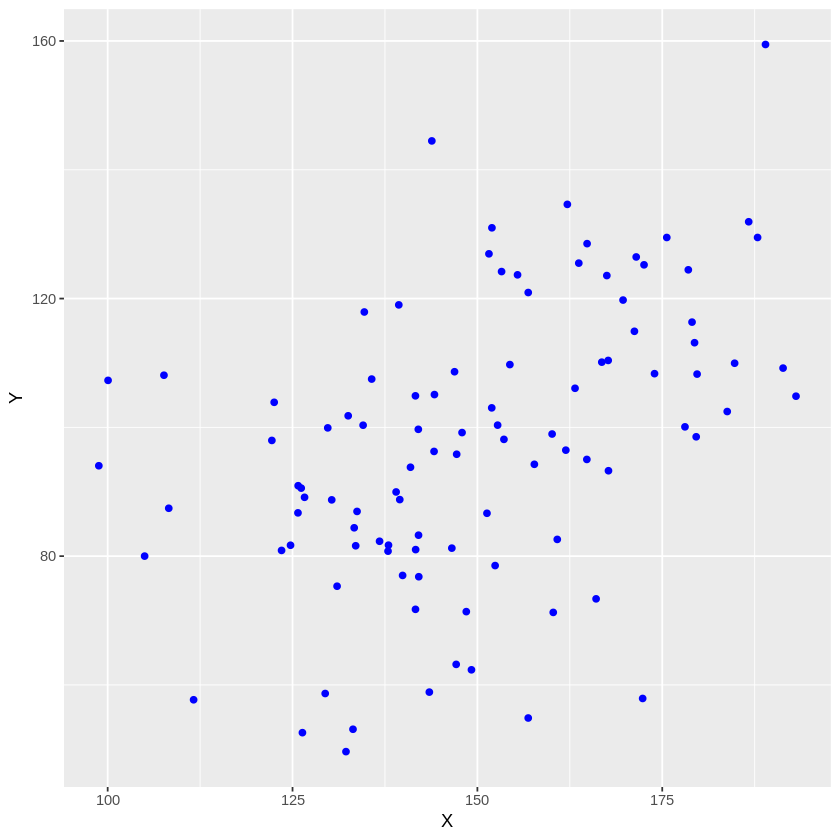

In [ ]:
colnames(don) <- c("X","Y")
don <- as.data.frame(don)
library(ggplot2)
ggplot(don) + aes(x=X, y=Y) + geom_point(colour="blue")

On introduit 73% de données manquantes (MCAR) sur une variables y.

"Missing Completely at Random" (MCAR) signifie que les données manquantes ne dépendent ni des valeurs observées ni des valeurs manquantes elles-mêmes. Autrement dit, la probabilité qu'une donnée soit manquante est la même pour toutes les observations et n'est liée à aucune variable spécifique.

In [ ]:
# Introduction des valeurs manquantes dans une colonne spécifique du jeu de données
donmiss <- don
indNA <- sample(1:n, 0.73*n)
donmiss[indNA, 2] <- NA

Imputation par la **méthode des moyennes**

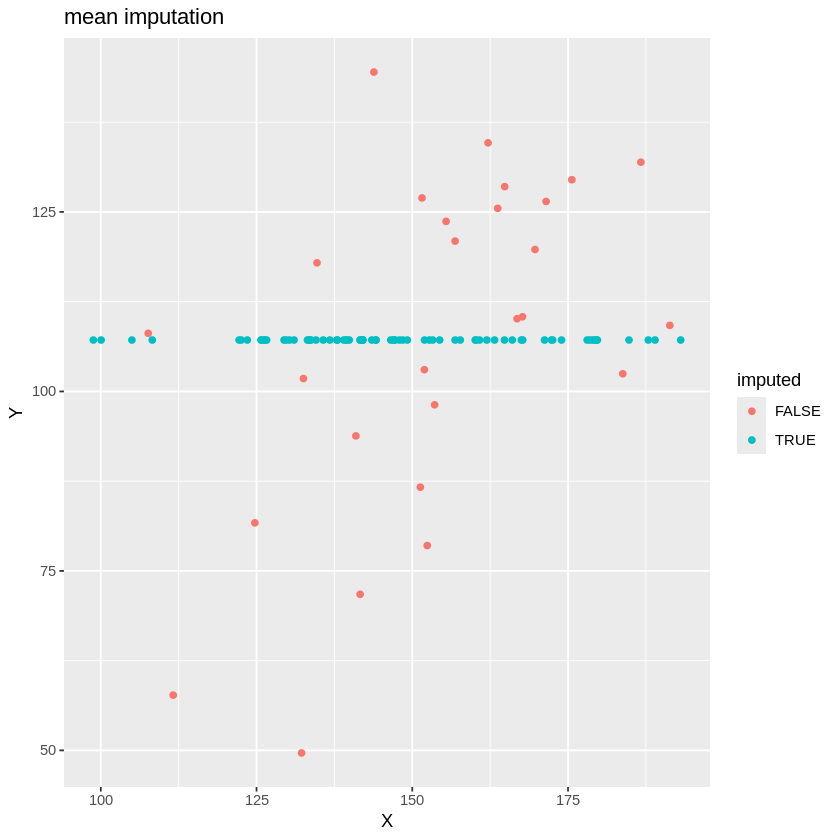

In [ ]:
# Imputation par la moyenne des valeurs manquantes dans notre jeu de données
donMean <- donmiss
donMean[indNA, 2] <- mean(donMean[, 2],na.rm=T)
imputed <- ((1:100)%in%indNA)
ggplot(donMean) + ggtitle("mean imputation") + aes(x=X, y=Y, colour=imputed) + geom_point()

Imputation par **régression des valeurs manquantes** dans la colonne Y de notre jeu de données

On la fait pour pouvoir prendre en compte la relation entre les variables.

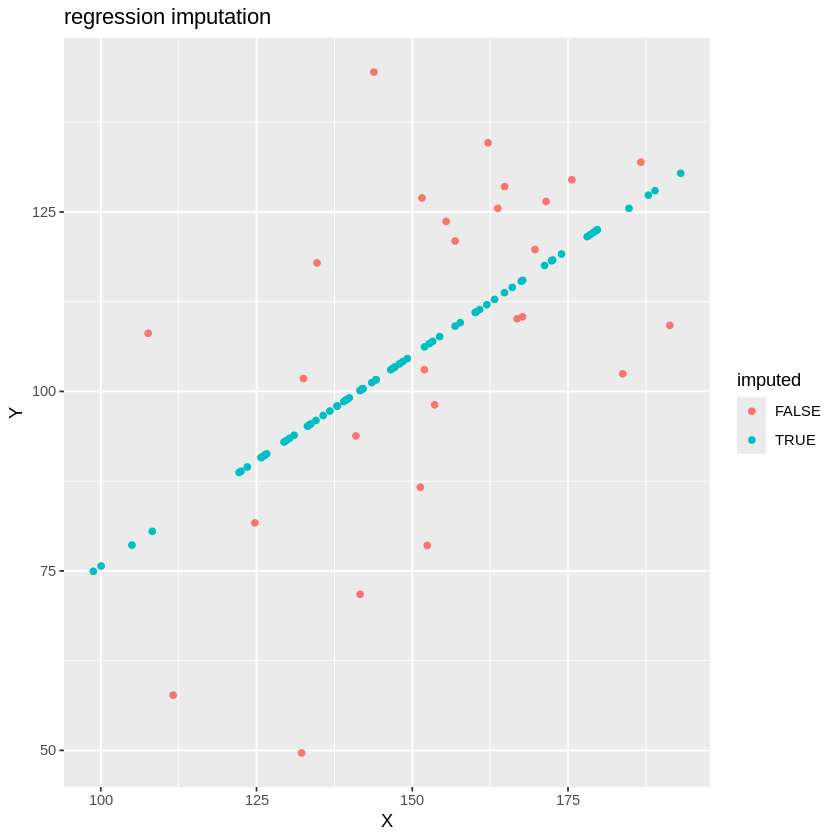

In [ ]:
reg <- lm(Y~X, data = donmiss)
donReg <- donmiss
donReg[indNA, 2] <- predict(reg, donmiss[indNA, 1,drop = F])
ggplot(donReg) + ggtitle("regression imputation") + aes(x=X, y=Y, colour=imputed) + geom_point()

**Imputation par régression stochastique**, qui consiste à ajouter une composante aléatoire aux valeurs prédites par un modèle de régression pour les valeurs manquantes

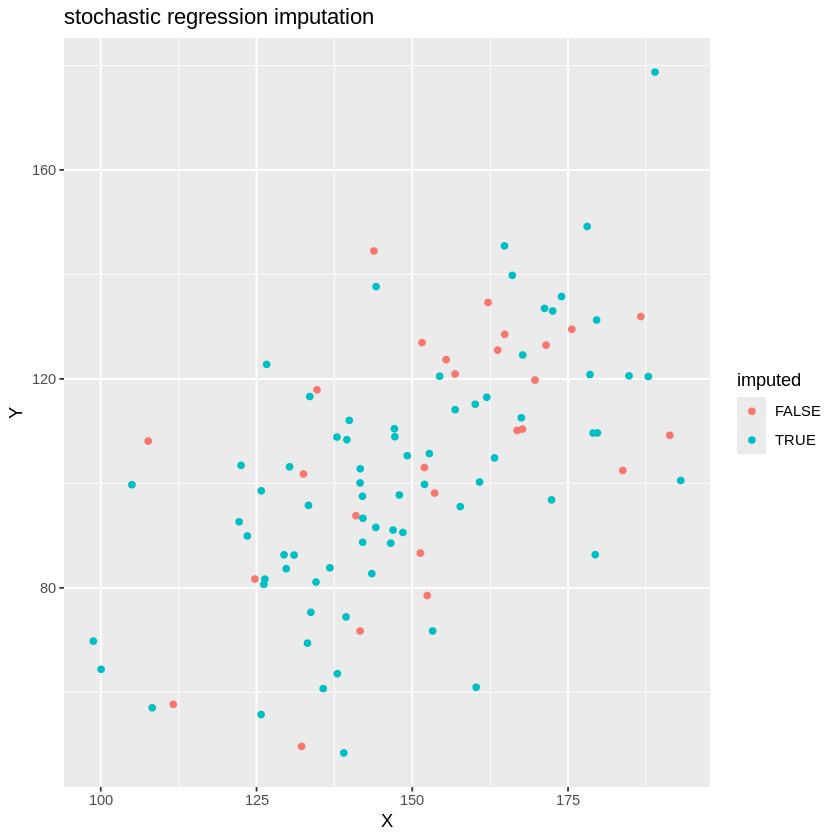

In [ ]:
donStochReg <- donmiss
donStochReg[indNA, 2] <- donReg[indNA, 2] + rnorm(length(indNA), 0, (summary(reg))$sigma)
ggplot(donStochReg) + ggtitle("stochastic regression imputation") + aes(x=X, y=Y, colour=imputed) + geom_point()

Il semble que nous ayons résolu le problème des valeurs manquantes grâce à cette imputation par régression stochastique. Les données imputées ressemblent aux données initiales.

Comparaison des différentes méthodes d'imputation des valeurs manquantes dans la colonne Y en calculant des statistiques (**moyenne, écart type, corrélation, intervalles de confiance**) pour chacune des trois méthodes d'imputation

In [ ]:
res <- cbind.data.frame(donMean[,2], donReg[, 2],  donStochReg[,2])
MM <- apply(res, 2, mean, na.rm = T)
SD <- apply(res, 2, sd, na.rm = T)
COR <- apply(res,2, cor, donmiss[,1])
INF <- MM - qt(.975, n-1) * SD/sqrt(n)
SUP <- MM + qt(.975, n-1) * SD/sqrt(n)
WIDTH <- SUP - INF
INCI <- (125<=SUP)&(125>=INF)
res <-  rbind.data.frame(MM, SD, COR, INF, SUP, WIDTH, INCI)
colnames(res) <-   c("MEAN","REG", "STOCH")
rownames(res) <- c("muhat_y", "sigmahat_y", "cor", "inf", "sup", "width", "coverage")
res

,MEAN,REG,STOCH
,<dbl>,<dbl>,<dbl>
muhat_y,107.1574543,104.7314439,102.0856375
sigmahat_y,12.2280911,16.3577592,24.1808372
cor,0.2623814,0.7694873,0.5890321
inf,104.7311357,101.4857096,97.2876348
sup,109.5837729,107.9771782,106.8836402
width,4.8526371,6.4914686,9.5960054
coverage,0.0000000,0.0000000,0.0000000


In [ ]:
install.packages("matrixStats")

In [ ]:
# simulation du processus d'imputation de données manquantes en utilisant trois
# méthodes différentes (imputation par la moyenne, régression, et régression stochastique)

# Way 1
SimuMiss <- function(){
# generate data
don <-rmvnorm(n, mean=c(125,125), sigma=matrix(c(625,375,375,625), ncol =2 ) )
colnames(don) <- c("X","Y")
don <- as.data.frame(don)

# generate missing values
donmiss <- don
indNA <- sample(1:n, 0.73*n)
donmiss[indNA, 2] <- NA

donMean <- donReg <- donStochReg <- donmiss

# Mean Imputation
donMean[indNA, 2] <- mean(donMean[, 2], na.rm = T)

# Regression Imputation
reg <- lm(Y~X, data = donmiss)
donReg[indNA, 2] <- predict(reg, donmiss[indNA, 1,drop = F])

# Stochastic Regression Imputation
donStochReg[indNA, 2] <- donReg[indNA, 2] + rnorm(length(indNA), 0, (summary(reg))$sigma)

# Estimating the mean, the variance of Y, and a confidence interval for mu_y
res <- cbind.data.frame(donMean[,2], donReg[, 2],  donStochReg[,2])
MM <- apply(res, 2, mean, na.rm = T)
SD <- apply(res, 2, sd, na.rm = T)
COR <- apply(res,2, cor, donmiss[,1])
INF <- MM - qt(.975, n-1) * SD/sqrt(n)
SUP <- MM + qt(.975, n-1) * SD/sqrt(n)

WIDTH <- SUP - INF
INCI <- (125<=SUP)&(125>=INF)

res <-  rbind.data.frame(MM, SD, COR, INF, SUP, WIDTH, INCI)
colnames(res) <-   c("MEAN","REG", "STOCH")
rownames(res) <- c("theta_y", "sigma_y", "cor", "inf", "sup", "width", "coverage")
return(res)
}

library(matrixStats)
resRepeat <- lapply(1:1000, function(i) SimuMiss())
bias <- colMeans(do.call(rbind, lapply(resRepeat, function(x) x[1,]-125)))
cov <- colMeans(do.call(rbind, lapply(resRepeat, function(x) x[7,])))
avg.width <- colMeans(do.call(rbind, lapply(resRepeat, function(x) x[6,])))
res <- rbind(bias, cov, avg.width)
res

,MEAN,REG,STOCH
bias,-0.1418279,-0.2198985,-0.09957295
cov,0.4110000,0.6150000,0.72100000
avg.width,4.9985244,7.1301865,9.83267377


In [ ]:
# simulation d'un processus de génération de données avec des valeurs manquantes (MCAR),
# et application de trois méthodes d'imputation (moyenne, régression,
#  régression stochastique), puis évalue la performance des méthodes
# Way 2
statcheck <- function(don){
 test <- t.test(don[,2])
 muhat <-test$estimate
 corhat <-cor(don[,1],don[,2])
 cov <- 0
 CImu <- if((125<=test$conf.int[2])&(125>=test$conf.int[1])) cov <- 1
 sigmahat <- sd(don[,2])
 widthCI <-test$conf.int[2] -test$conf.int[1]
 return(list(muhat=muhat, sigmahat= sigmahat,  corhat = corhat , cov=cov,  widthCI= widthCI))
}

MCAR <-function(don, percent)
{
  indNA <- sample(1:nrow(don), percent*nrow(don))
  don[indNA, 2] <- NA
  return(don)
}

Impute <-function(don){
don<-as.data.frame(don)
colnames(don)=c("X","Y")
donMean<-donReg<-donStochReg<-don
indNA <- which(is.na(don[,2]))
# Mean Imputation
donMean[indNA, 2] <- mean(don[, 2], na.rm = T)

# Regression Imputation
reg <- lm(Y~X, data = don)
donReg[indNA, 2] <- predict(reg, don[indNA, 1,drop = F])

# Stochastic Regression Imputation
donStochReg[indNA, 2] <- donReg[indNA, 2] + rnorm(length(indNA), 0, (summary(reg))$sigma)
return(list(donMean=donMean, donReg=donReg, donStochReg=donStochReg))
}

# Replicate 1000 times the simulation
n <- 100
res <-replicate(1000, rmvnorm(n, mean=c(125,125), sigma=matrix(c(625,375,375,625), ncol =2 ) )) # replicate function here outputs an array
arraymiss <- apply(res, MARGIN=3, FUN=MCAR, percent=0.73)
aa <-array(arraymiss, dim = c(n, 2, 10))
bb <- apply(aa, 3, Impute)
cc <- lapply(bb, lapply, statcheck)
dd <- lapply(cc, unlist)
RES<- Reduce("+", dd) / length(dd)
RES<-as.data.frame(matrix(RES, 3, 5, byrow=T))
colnames(RES) <- c("muhat", "sigmahat","corhat", "cov_mu", "width_CI_mu")
rownames(RES) <- c("MEAN", "REGRESSION", "REGSTO")
RES

,muhat,sigmahat,corhat,cov_mu,width_CI_mu
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MEAN,121.7815,12.70873,0.2802856,0.5,5.043377
REGRESSION,122.3450,18.56322,0.8152773,0.5,7.366693
REGSTO,122.9401,25.63011,0.5932768,0.3,10.171140


Toutes les méthodes d'imputation sous-estiment légèrement la moyenne réelle de 125.  La régression stochastique présente l'estimation de l'écart-type la plus élevée, reflétant une meilleure préservation de la variance des données d'origine. La régression stochastique montre la meilleure couverture de l'intervalle de confiance pour la moyenne, son intervalle de confiance est le plus large, ce qui signifie une incertitude plus élevée  mais aussi une meilleure précision en incluant la variabilité.

Pour améliorer, on peut Utiliser la régression stochastique, qui semble mieux préserver les caractéristiques de l'ensemble de données d'origine (variance et corrélation). Réduire la proportion de données manquantes (actuellement 73%) peut aussi améliorer la robustesse des estimations.

In [ ]:
SimuMiss <- function(method){
# generate data
don <-rmvnorm(n, mean=c(125,125), sigma=matrix(c(625,375,375,625), ncol =2 ) )
colnames(don) <- c("X","Y")
don <- as.data.frame(don)

# generate missing values
donmiss <- don
if (method == "MCAR"){
indNA <- sample(1:n, 0.73*n)
donmiss[indNA, 2] <- NA
}
if (method == "MAR"){
donmiss[donmiss[,1]<=140, 2] <- NA
indNA <- which(is.na(donmiss[,2]))
}
if (method == "MNAR"){
donmiss[donmiss[,2]<=140, 2] <- NA
indNA <- which(is.na(donmiss[, 2]))
}

donMean <- donReg <- donStochReg <- donmiss

# Mean Imputation
donMean[indNA, 2] <- mean(donMean[, 2], na.rm = T)

# Regression Imputation
reg <- lm(Y~X, data = donmiss)
donReg[indNA, 2] <- predict(reg, donmiss[indNA, 1,drop = F])

# Stochastic Regression Imputation
donStochReg[indNA, 2] <- donReg[indNA, 2] + rnorm(length(indNA), 0, (summary(reg))$sigma)

# Estimating the mean, the variance of Y, and a confidence interval for mu_y
res <- cbind.data.frame(donmiss[, 2], donMean[,2], donReg[, 2],  donStochReg[,2])
MM <- apply(res, 2, mean, na.rm = T)
SD <- apply(res, 2, sd, na.rm = T)
INF <- MM - qt(.975, n-1) * SD/sqrt(n)
SUP <- MM + qt(.975, n-1) * SD/sqrt(n)

# Complete case Analysis
INF[1] <- MM[1] - qt(.975, n-(length(indNA))-1) * SD[1]/sqrt(n-(length(indNA))-1)
SUP[1] <- MM[1] + qt(.975, n-(length(indNA))-1) * SD[1]/sqrt(n-(length(indNA))-1)

INCI <- (125<=SUP)&(125>=INF)
WIDTH <- SUP - INF
res = rbind.data.frame(MM, SD, INF, SUP, INCI, WIDTH)
colnames(res) =  c("CA", "MEAN","REG", "STOCH")
return(res)
}
# SimuMiss("MCAR")


MAT <- MAT1 <- MAT2 <- matrix(0, 6, 4)
#for (i in 1:10000){
MAT <- MAT + as.matrix(SimuMiss("MCAR"))
MAT1 <- MAT1 + as.matrix(SimuMiss("MAR"))
MAT2 <- MAT2 + as.matrix(SimuMiss("MNAR"))
#}
#cbind.data.frame(MAT,MAT1,MAT2)/10000

Imputation avec une **distribution gaussienne conjointe**

In [ ]:
# Imputation de données manquantes en se basant sur une distribution normale conjointe.
library(norm)
pre <- prelim.norm(as.matrix(donmiss))
thetahat <- em.norm(pre)
getparam.norm(pre,thetahat)

Iterations of EM: 
1...2...3...4...5...6...7...8...9...10...11...12...13...14...15...16...17...18...19...20...21...22...23...24...25...26...27...28...29...30...31...32...33...34...35...36...37...38...39...40...41...


585.1066,252.6683
252.6683,487.5254


In [ ]:
# Very important: rngseed MUST be called before using imp.norm
# Imputation multiple en tirant des valeurs pour remplacer les valeurs manquantes dans un jeu de données
rngseed(1e5)
imp.draw <- imp.norm(pre,thetahat,donmiss)

Imputation basée sur **l'espérance conditionnelle** pour les valeurs manquantes dans un jeu de données (donmiss), en se basant sur** une distribution normale conjointe dont les paramètres (moyennes et covariances)** ont été estimés à l'aide de l'algorithme EM.

In [ ]:
to_matrix = function(x, horiz){
  # Helper function that converts to matrix
  # while ensuring that the orientation is the right one if
  # the inpute is just a vector (->column or row matrix)
  if(!is.null(dim(x))){
    return(x)
  }
  else{
    if(!horiz){
      return(as.matrix(x))
    }
    else{
      return(t(as.matrix(x)))
    }
  }
}

estimate.1row = function(row, s, m){
  # Used to perform the imputation on one row
  miss_col = is.na(row)
  nmiss = sum(miss_col)
  if(nmiss>0){
    mu.miss = m[miss_col]
    mu.obs = m[!miss_col]
    sigma.miss = s[miss_col,miss_col]
    sigma.miss.obs = to_matrix(s[miss_col,!miss_col], horiz=nmiss==1)
    sigma.obs = s[!miss_col,!miss_col]
    mu_cond = mu.miss + sigma.miss.obs %*% solve(sigma.obs) %*% (row[!miss_col] - mu.obs)
    row[miss_col] = mu_cond
  }
  return(row)
}


params = getparam.norm(pre,thetahat)
sigma = params$sigma
mu = params$mu
imp.expectation = t(apply(donmiss, 1, function(x){estimate.1row(x,s=sigma, m=mu)}))

## **Multiple imputation**

Le code réalise une **imputation multiple sur des données manquantes** en utilisant trois mécanismes différents : **MCAR** (Missing Completely At Random), **MAR** (Missing At Random), et **MNAR** (Missing Not At Random). Il applique ensuite les règles de Rubin pour combiner les résultats des imputations multiples.

In [ ]:
IMPMULT <- function(method, M){
# generate data
don <-rmvnorm(n, mean=c(125,125), sigma=matrix(c(625,375,375,625), ncol = 2 ) )
colnames(don) <- c("X","Y")
don <- as.data.frame(don)

# generate missing values
donmiss <- don
if (method == "MCAR"){
indNA <- sample(1:n, 0.73*n)
donmiss[indNA, 2] <- NA
}
if (method == "MAR"){
donmiss[donmiss[,1]<=140, 2] <- NA
indNA <- which(is.na(donmiss[,2]))
}
if (method == "MNAR"){
donmiss[donmiss[,2]<=140, 2] <- NA
indNA <- which(is.na(donmiss[,2]))
}

# Multiple Imputation
ThetaHat = VarThetaHat = rep(NA, M)
for (j in 1:M){
donStochReg <- donmiss
# Bootstrap to reflect the sampling variability and have a proper multiple imputation method
indsample <- sample(1:n, replace = T)
reg <- lm(Y~X, data = donmiss[indsample,])
donStochReg[indNA, 2] <-  predict(reg, donmiss[indNA, 1,drop = F]) +rnorm(length(indNA), 0, (summary(reg))$sigma)
ThetaHat[j] <- mean(donStochReg[, 2])
VarThetaHat[j] <- var(donStochReg[, 2])/n
}

# Combine the results according to Rubin rules
ThetaHatBar  <- mean(ThetaHat)
T  <- mean(VarThetaHat)  + (1 + 1/M)* var(ThetaHat)

IMddf  <- (M-1)*(1 + mean(VarThetaHat)/((M+1)*var(ThetaHat)))^2

IMINF <- ThetaHatBar - qt(.975, df = IMddf)*sqrt(T)
IMSUP <- ThetaHatBar + qt(.975, df = IMddf)*sqrt(T)

IMINCI <- (125<=IMSUP)&(125>=IMINF)
IMWIDTH <- IMSUP - IMINF
res = rbind.data.frame(ThetaHatBar, IMINF, IMSUP, IMINCI, IMWIDTH)
colnames(res) =  c("IM")
return(res)
}
# IMPMULT("MCAR", M = 100)

MAT= MAT1 = MAT2 = rep(0,5)
#for (i in 1:10000){
MAT = MAT + as.matrix(IMPMULT("MCAR", M = 100))
MAT1 = MAT1 + as.matrix(IMPMULT("MAR", M = 100))
MAT2 = MAT2 + as.matrix(IMPMULT("MNAR", M = 100))
#}
MAT/10000
MAT1/10000
MAT2/10000

IM
0.013414820
0.012620754
0.014208886
0.000000000
0.001588132


IM
0.011412607
0.009249761
0.013575452
0.000100000
0.004325690


IM
0.015506417
0.014824400
0.016188435
0.000000000
0.001364035
